# Librerias

In [10]:
%matplotlib notebook
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
init_printing()

# Optimización

En general, la optimización es el proceso de encontrar y seleccionar el elemento óptimo
de un conjunto de candidatos factibles. En la optimización matemática, este problema generalmente se formula como determinar el valor extremo de una función de un dominio dado.

Un valor extremo, o un valor óptimo, puede referirse al mínimo o al máximo de la función, dependiendo de la aplicación y el específico problema.

La optimización está estrechamente relacionada con la resolución de ecuaciones porque, con un valor óptimo de una función, es derivada, o gradiente en el caso de multivariante, es cero.

un método para resolver problemas de optimización es resolver por los ceros de la derivada o gradiente y prueba los candidatos resultantes para la optimalidad. Sin embargo, este enfoque no siempre es factible y, a menudo, se requiere tomar otros enfoques numéricos

Aquí restringimos nuestra atención a la optimización matemática de las funciones de valores reales, con uno o más variables dependientes.

## Optimización de una variable

Determine los máximos y mínimos relativos de la función 

$$f(x)= x^3 - 3x^2 - 24x + 32$$ 

In [2]:
var("x y t")

<IPython.core.display.Javascript object>


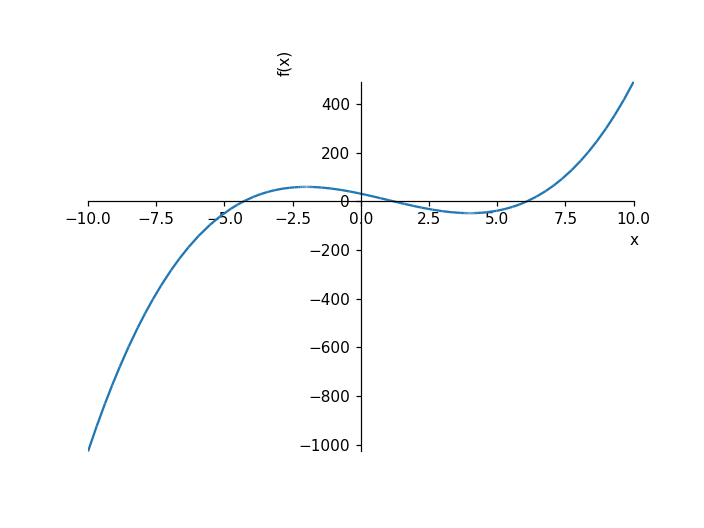

In [3]:
f = x**3 - 3*x**2 - 24*x + 32
plot(f)

# Procedimiento para determinar extremos relativos de una función continua

- Calcular $f'(x)$ y $f''(x)$

In [4]:
f = x**3 - 3*x**2 - 24*x + 32
df = f.diff()
ddf = df.diff()
df,ddf

- Determine los valores críticos de la función en los cuales $f'(x) =0$

In [5]:
pc = solve(df)
pc

- Calcule $f''(c)$ para cada valor crítico $c$

In [6]:
ddf.subs(x,pc[0]),ddf.subs(x,pc[1])

- Si $f''(c)< 0$, entonces $f$ tiene un máximo relativo en c.
- Si $f''(c)> 0$, entonces $f$ tiene un mínimo relativo en c.
- Si $f''(c)= 0$, entonces la prueba fracasa.

In [7]:
def SegDeriv(f):
    df = f.diff()
    ddf = df.diff()
    pc = solve(df)
    for c in pc:
        ec = ddf.subs(f.free_symbols.pop(),c)
        #print (ec) # Para mostrar ejemplo 2
        if ec <0:
            print ("Tiene un máximo relativo en ",c,"y es:",ec)
        if ec >0:
            print ("Tiene un mínimo relativo en ",c,"y es:",ec)

In [8]:
f = x**3 - 3*x**2 - 24*x + 32
SegDeriv(f)

Tiene un máximo relativo en  -2 y es: -18
Tiene un mínimo relativo en  4 y es: 18


## Ejemplo

Un agricultor tiene $2 400$ metros de material y quiere construir una barda para
cercar un campo rectangular que bordea un río recto, de modo que no necesita barda a
lo largo del río. 

¿Cuáles son las dimensiones que debe tener el campo para encerrar el
área más grande?

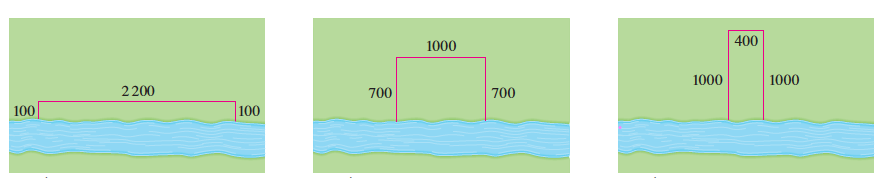

### Solución

- Queremos maximizar el área $A$ del rectángulo.

$$A(x,y) = xy $$

Ademas tenemos una restriccion,utilizamos la información dada de que la longitud total de la barda es $2400$ metros

$$2x + y = 2400 $$

In [11]:
A= x*y
eq1 = Eq(2*x+y,2400)
A,eq1

In [12]:
# De esta ecuación tenemos
y_ = solve(eq1,y)
y_

In [13]:
# lo cual da
f = A.subs(y,y_[0])
f

Tenga en cuenta que $x >= 0$ y $x <= 1200$ (de lo contrario A < 0), así que la función que deseamos maximizar es

$$ f(x) = x(−2x+2400) $$

In [14]:
df = f.diff()
ddf = df.diff()
pc = solve(df)
pc

In [13]:
#SegDeriv(f)

Así, el campo rectangular debe tener $x=600$ metros de largo

In [15]:
eq1.subs(x,600)

In [16]:
solve(eq1.subs(x,600),y)

Y $1200$ metros de ancho

## Ejemplo

Se va un fabricar una lata que ha de contener $1 L$ de aceite. Encuentre
las dimensiones que debe tener la lata de manera que minimicen el costo del metal para fabricarla.

### Solución 
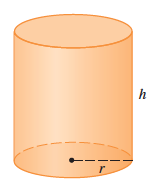

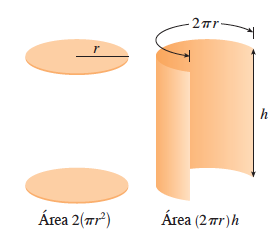

observamos que los lados se fabrican de una lámina rectangular con dimensiones $2\pi r$ y $h$.

De esta manera, el área superficial es
$$A(r,h) = 2\pi r^2 + 2\pi r h  $$

Para eliminar $h$ recurrimos al hecho de que el volumen está dado como $1 L$, que tomamos como $1000$ $cm^3$

$$\pi r^2h=1000 $$

In [16]:
#var ("r h")
r,h= symbols("r,h",real=True)
A= 2*pi*r**2 + 2*pi*r*h
eq1 = Eq(pi*r**2*h,1000)
A,eq1

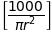

In [17]:
y_ = solve(eq1,h)
y_

In [18]:
f = A.subs(h,y_[0])
f

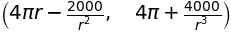

In [19]:
# SegDeriv(f) 
# Va marcar error cannot determine truth value of Relational
# por que quiere evaluar 4*pi + 4000/r**3

df = f.diff()
ddf = df.diff()

df,ddf

In [20]:
# puntos criticos
pc = solve(df)
pc

In [21]:
N(pc[0])

In [22]:
ddf.subs(r,pc[0]) 

In [23]:
N ( solve(eq1.subs(r,pc[0]),h )[0] )

Así, para minimizar el costo de la lata, el radio debe ser {{pc}} cm y la altura debe ser igual al doble del radio, es decir, el diámetro.

## Máximos y mínimos de funciones de dos variables

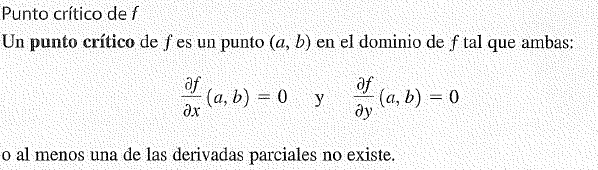

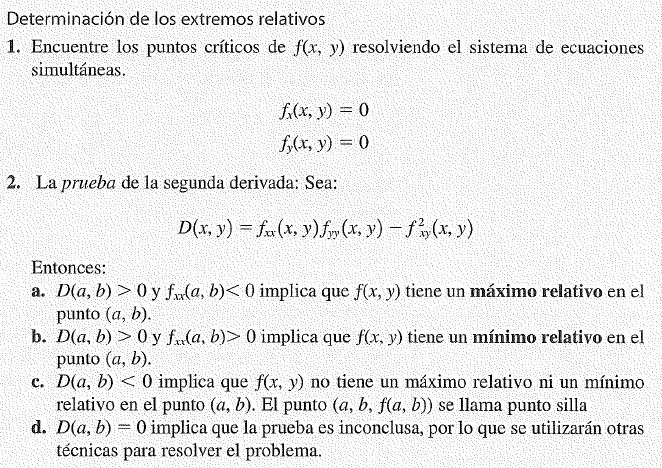

## Ejemplo: Encuentre y determine los extremos relativos de la funcion:

$$f(x,y) = x^2 + y^2$$

In [24]:
f=x**2 + y**2
dfx = f.diff(x)
dfy = f.diff(y)

pc = solve( [dfx, dfy],[x,y])

dfx,dfy,pc

In [25]:
dfxx = dfx.diff(x)
dfxy = dfx.diff(y)
dfyx = dfy.diff(x)
dfyy = dfy.diff(y)
D = dfxx*dfyy - dfxy
D.subs(pc),dfxx.subs(pc)

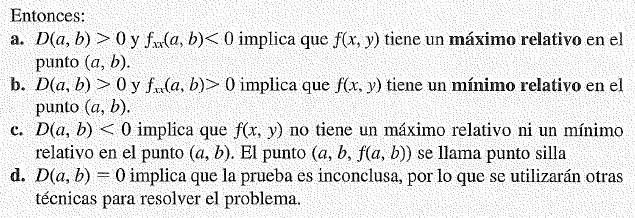

Concluimos que $f(x,y)$ tiene un minimo relativo en el punto {{pc}}

# Optimización sin restricciones en varias variables


In [26]:
f=x**2 + y**2

In [27]:
#gradient
nablaf = [ f.diff(var) for var in [x,y] ]
nablaf

In [28]:
#Punto criticos
solve(nablaf)

In [29]:
#hessian
[[f.diff(varx).diff(vary) for varx in [x,y] for vary in [x,y]]]

Si todas las segundas derivadas parciales de f existen, se define la matriz hessiana de f como:
$$H_f(x)_{i,j}={\frac  {\partial ^{2}\,f({\mathbf  {x}})}{\partial x_{i}\,\partial x_{j}}} $$

tomando la siguiente forma
$$H(f)={\begin{bmatrix}{\frac  {\partial ^{2}f}{\partial x_{1}^{2}}}&{\frac  {\partial ^{2}f}{\partial x_{1}\partial x_{2}}}&\cdots &{\frac  {\partial ^{2}f}{\partial x_{1}\partial x_{n}}}\\{\frac  {\partial ^{2}f}{\partial x_{2}\partial x_{1}}}&{\frac  {\partial ^{2}f}{\partial x_{2}^{2}}}&\cdots &{\frac  {\partial ^{2}f}{\partial x_{2}\partial x_{n}}}\\\vdots &\vdots &\ddots &\vdots \\{\frac  {\partial ^{2}f}{\partial x_{n}\partial x_{1}}}&{\frac  {\partial ^{2}f}{\partial x_{n}\partial x_{2}}}&\cdots &{\frac  {\partial ^{2}f}{\partial x_{n}^{2}}}\end{bmatrix}}$$

In [30]:
H= hessian(f,[x,y])
H

⎡2  0⎤
⎢    ⎥
⎣0  2⎦

In [31]:
H.eigenvals()

Concluimos que la matriz es definida positiva porque los dos valores propios son positivos y repetidos igual a 2, entonces tiene un minimo relativo en el punto {{pc}}

## Condicion de suficiencia

- En el punto extremo, si la matrix de segundas derivadas parciales (Matriz Hessiana) es **positiva definida** entonces es un **mínimo relativo**

- En el punto extremo, si la matrix de segundas derivadas parciales (Matriz Hessiana) es **negativa definida** entonces es un **máximo relativo**

- En el punto extremo, si la Matriz Hessiana no es **positiva definida** ni **negativa definida** entonces es un punto **silla**

## Métodos de clasificación

- Por valores propios
- Criterio de Sylvester

### Por valores propios

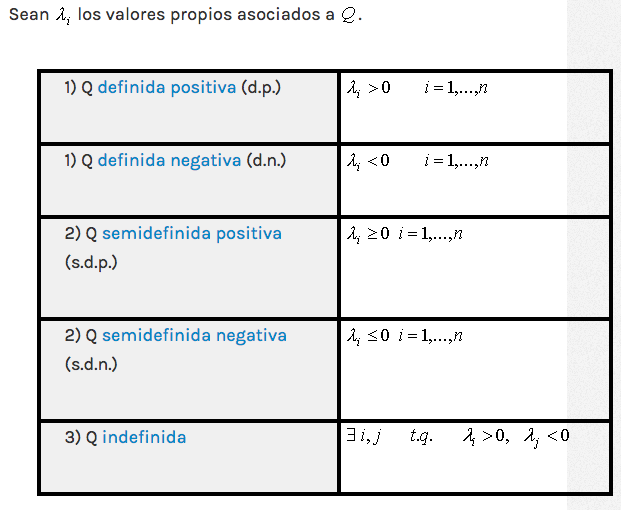

### Criterio de Sylvester

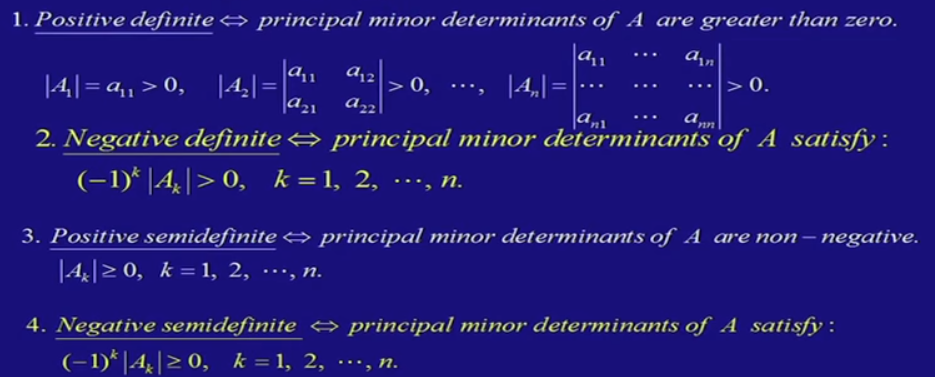

## Ejemplo

$f(x,y) = x^3 + 3y^3 + 3x^2 + 3y^2 + 24$

In [29]:
# Solucion:
f= x**3+3*y**3+3*x**2+3*y**2+24
f

In [46]:
[f.diff(x),f.diff(y)]

In [30]:
#gradient
nablaf = [ f.diff(var) for var in [x,y] ]
nablaf

In [31]:
#Puntos criticos
pcs= solve(nablaf)
pcs

In [32]:
H= hessian(f,[x,y])
H

⎡6⋅x + 6     0    ⎤
⎢                 ⎥
⎣   0     18⋅y + 6⎦

In [50]:
H.subs?

In [33]:
for pc in pcs:
    eig = H.subs(pc).eigenvals()
    print ("Punto critico:",pc," sus eigenvalores son: ",eig)

Punto critico: {x: -2, y: -2/3}  sus eigenvalores son:  {-6: 2}
Punto critico: {x: -2, y: 0}  sus eigenvalores son:  {-6: 1, 6: 1}
Punto critico: {x: 0, y: -2/3}  sus eigenvalores son:  {-6: 1, 6: 1}
Punto critico: {x: 0, y: 0}  sus eigenvalores son:  {6: 2}


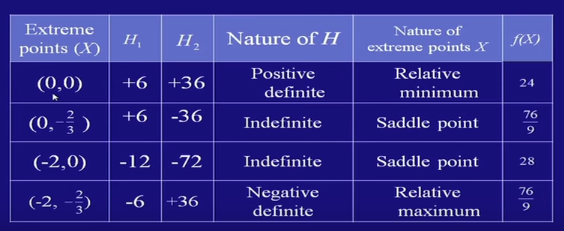

<IPython.core.display.Javascript object>


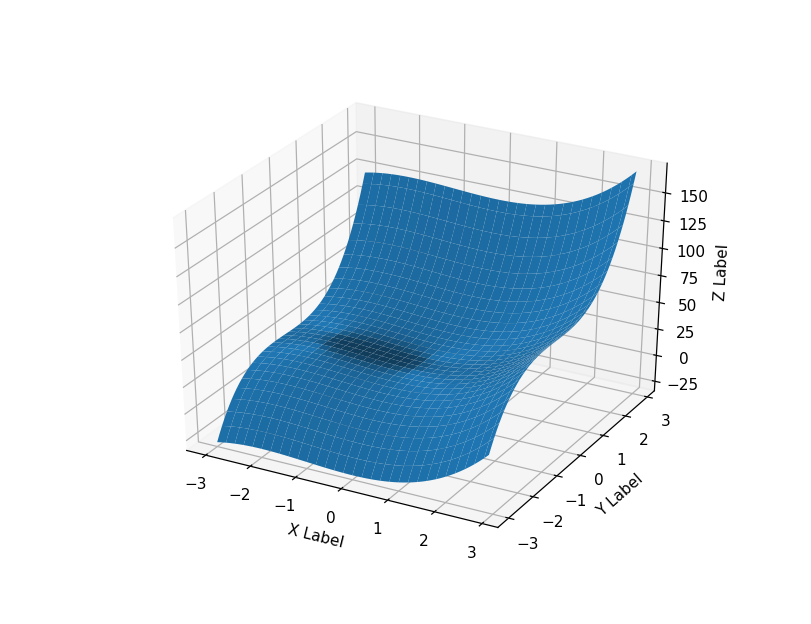

In [47]:
x_ = np.arange(-3, 3, .1)
y_ = np.arange(-3, 3, .1)

xx_, yy_ = np.meshgrid(x_, y_)
F = xx_**3 + 3*yy_**3 + 3*xx_**2 + 3*yy_**2 + 24

fig = plt.figure()
ax = fig.gca(projection="3d")
surf = ax.plot_surface(xx_, yy_, F)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

## Ejemplo: Maximización de utilidades 

El total de los ingresos semanales que obtiene una fabrica y vender sus sistemas de estantes con altavoces está dado por.

$$R(x,y) = -\frac{1}{4}x^2 -\frac{3}{8}y^2 - \frac{1}{4}xy + 300x +240y  $$

- donde $x$ denota el número completo de unidades ensambladas
- $y$ el número de kits fabricados y vendidos cada semana.

El total del costo semanal atribuible a la fabricación de esos altavoces es:

$$C(x,y) = 180x + 140y + 5000 $$

Determine cuántas unidades ensambladas y cuántos kits debería fabricar por semana para maximizar sus utilidades.

**¿Cuál es la utilidad máxima?**

### Solucion:

In [38]:
I = -1/4*x**2 - 3/8*y**2 -1/4*x*y + 300*x + 240*y
C = 180*x + 140*y + 5000
U= I - C
U

In [39]:
#gradient
nablaf = [ U.diff(var) for var in [x,y] ]
nablaf

In [40]:
#Punto criticos
pcs= solve(nablaf)
pcs

In [41]:
H= hessian(U,[x,y])
H

⎡-0.5   -0.25⎤
⎢            ⎥
⎣-0.25  -0.75⎦

In [42]:
eig = H.subs(pcs).eigenvals()
print ("Punto critico:",pcs," sus eigenvalores son: ",eig)

Punto critico: {x: 208.000000000000, y: 64.0000000000000}  sus eigenvalores son:  {-5/8 - sqrt(5)/8: 1, -5/8 + sqrt(5)/8: 1}


In [43]:
for i in eig:
    print (i.evalf() )

-0.904508497187474
-0.345491502812526


In [44]:
U.subs(pcs)

Ambos eig son negativos entonces es un maximo en {{pcs}} y la utilidad máxima es {{U.subs(pcs)}}

# Multiplicadores de Lagrange

En esta sección se trata el método de Lagrange
para maximizar o minimizar una función general $f (x, y, z)$ sujeta a una restricción, o condición
secundaria, de la forma $g(x, y, z) = k$.

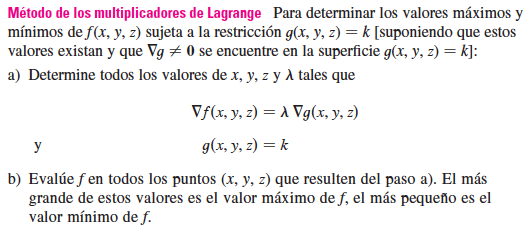

## Ejemplo

Una caja rectangular sin tapa se hace con $12 m^2$ de cartón.

Calcule el volumen máximo de esta caja.

Solucion:

Sean $x, y$ y $z$ el largo, el ancho
y la altura, respectivamente, de la caja medidos en metros. Buscamos maximizar

$$V=xyz $$

sujeta a la restricción

$$g(x,y,z) = 2xz + 2yz + xy = 12$$

In [18]:
x,y,z,ld = symbols("x y z \lambda")

V = x*y*z
g = 2*x*z + 2*y*z +x*y -12

In [19]:
L = V - ld*g
L

In [20]:
pcs= solve(map(L.diff,[x,y,z,ld]))
pcs

In [21]:
V.subs(pcs[0]),V.subs(pcs[1])

In [22]:
list(map(L.diff,[x,y,z,ld]))

## Ejemplo

Un agricultor tiene $2 400$ metros de material y quiere construir una barda para
cercar un campo rectangular que bordea un río recto, de modo que no necesita barda a
lo largo del río. 

¿Cuáles son las dimensiones que debe tener el campo para encerrar el
área más grande?

### Solución

- Queremos maximizar el área $A$ del rectángulo.

$$A(x,y) = xy $$

Ademas tenemos una restriccion, utilizamos la información dada de que la longitud total de la barda es $2400$ metros

$$2x + y = 2400 $$

In [23]:
L = x*y + ld*(2*x + y - 2400)
pcs= solve(map(L.diff,[x,y,ld]))
L.subs(pcs),(x*y).subs(pcs),pcs

## Ejemplo

Se va un fabricar una lata que ha de contener $1 L$ de aceite. Encuentre
las dimensiones que debe tener la lata de manera que minimicen el costo del metal para fabricarla.

De esta manera, el área superficial es
$$A(r,h) = 2\pi r^2 + 2\pi r h  $$

El volumen está dado como $1 L$, que tomamos como $1000$ $cm^3$

$$\pi r^2h=1000 $$

In [51]:
# Multiplicadores de lagrange
L = 2*pi*r**2 + 2*pi*r*h  +ld*(pi*r**2*h -1000) 
pcs= solve(map(L.diff,[r,h,ld]))
pcs
L.subs(pcs[0]),N ( (2*pi*r**2 + 2*pi*r*h).subs(pcs[0]) ),pcs

Referencias:

- https://es.wikipedia.org/wiki/Matriz_definida_positiva
- http://www.ub.edu/matheopt/optimizacion-economica/forma-cuadratica
- https://es.wikipedia.org/wiki/Criterio_de_Sylvester
- https://es.wikipedia.org/wiki/Matriz_hessiana
- https://www.youtube.com/watch?v=qzXPaWl-BzM

In [22]:
!open .

In [32]:
map?

In [33]:
items = [1, 2, 3, 4, 5]

def sqr(x):
    return x ** 2

list(map(sqr, items))